In [20]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

nx=32+4
ny=32+4
nz=32+4
nd=19
nloop=100+1
step=1

In [21]:
input_file  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T10-cg1-L100/NAllHDF001.h5'

'''
data = np.loadtxt(dir53+'NAllHDF001.h5', delimiter=',', unpack=True ,dtype='float')
a = np.arange(nd)
#a
print(data.shape)
rdata = np.reshape(data[a, :], (nd, ny ,nx))
rdata[0,:,:]
#rdata.transpose(0,2, 1)

err=rdata[6,:,:]-rdata[12,:,:]
rms = np.sqrt(np.mean(err*err))

rms
'''


h5file = h5py.File(input_file,"r")
#fig, (ax_random, ax_spectrum) = plt.subplots(1,2,figsize = (14,5.5))

#for sample_frequency in np.array([10.,100,1000.]):
    
folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 
    
#データ読み込み
Phiwv1  = h5file[folder1+"/Phiwv1"].value 
Phiexa  = h5file[folder2+"/Phiexa"].value 
#spectrum = h5file[folder+"/spectrum"].value
    
#plot
#ti = np.arange(0,100.,1)/sample_frequency
#ax_random.plot(ti,random,'o')
#ax_spectrum.plot(np.abs(spectrum))

Phiwv1
Phiexa

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


array([[[6.4371533, 6.4313755, 6.4256063, ..., 6.4256063, 6.4313755,
         6.4371533],
        [6.4313755, 6.4254107, 6.4194503, ..., 6.4194503, 6.4254107,
         6.4313755],
        [6.4256063, 6.4194503, 6.4132943, ..., 6.4132943, 6.4194503,
         6.4256063],
        ...,
        [6.4256063, 6.4194503, 6.4132943, ..., 6.4132943, 6.4194503,
         6.4256063],
        [6.4313755, 6.4254107, 6.4194503, ..., 6.4194503, 6.4254107,
         6.4313755],
        [6.4371533, 6.4313755, 6.4256063, ..., 6.4256063, 6.4313755,
         6.4371533]],

       [[6.4313755, 6.4254107, 6.4194503, ..., 6.4194503, 6.4254107,
         6.4313755],
        [6.4254107, 6.419248 , 6.4130855, ..., 6.4130855, 6.419248 ,
         6.4254107],
        [6.4194503, 6.4130855, 6.4067163, ..., 6.4067163, 6.4130855,
         6.4194503],
        ...,
        [6.4194503, 6.4130855, 6.4067163, ..., 6.4067163, 6.4130855,
         6.4194503],
        [6.4254107, 6.419248 , 6.4130855, ..., 6.4130855, 6.419248 ,
   

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


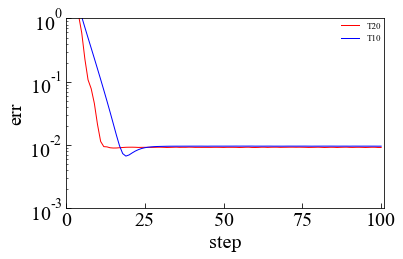

0.9533286

In [32]:
dir1  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T20-cg1-L100-grvmn/'
dir2  = '/Users/maeda/Desktop/Dropbox/analysis/telegraph-test-3D-shusoku/telegraph-64-1000st-T10-cg1-L100-grvmn/'

folder1="Phiwv"  #+ str(np.int(sample_frequency)) 
folder2="Phiexa"  #+ str(np.int(sample_frequency)) 


rms1 = [0] * nloop
rms2 = [0] * nloop

ratio = [0] * nloop

b = np.arange(nloop)
b=b*step
for i in range(1,nloop):
    
    h5file1 = h5py.File(dir1+'NAllHDF'+"%03.f"%(i)+'.h5',"r")
    h5file2 = h5py.File(dir2+'NAllHDF'+"%03.f"%(i)+'.h5',"r")

    #データ読み込み
    Phiwv1to1  = h5file1[folder1+"/Phiwv1"].value 
    Phiexa1 = h5file1[folder2+"/Phiexa"].value 
    
    Phiwv1to2  = h5file2[folder1+"/Phiwv1"].value 
    Phiexa2  = h5file2[folder2+"/Phiexa"].value 
    
    #spectrum = h5file[folder+"/spectrum"].value
    #data = np.loadtxt(dir53+'phi2D'+"%05.f"%(i)+'.dat', delimiter=',', unpack=True ,dtype='float') 
    #rdata = np.reshape(data[a, :], (nd, ny ,nx))
    
    #err=0.25*(rdata[6,:,:]+rdata[7,:,:]+rdata[8,:,:]+rdata[9,:,:])-rdata[12,:,:]
    err1=Phiwv1to1- Phiexa1
    err2=Phiwv1to2- Phiexa2
    rms1[i] = np.sqrt(np.mean(err1*err1))
    rms2[i] = np.sqrt(np.mean(err2*err2))
    
    ratio[i]=rms1[i]/rms2[i]


rms1[0]=100
rms2[0]=100

ratio[0] = 1

fig = plt.figure()
#fig.subplots_adjust(bottom=0.21)
#fig.subplots_adjust(left=0.1)
#fig.subplots_adjust(right=0)
ax = fig.add_subplot(111)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams['mathtext.default'] = 'it'
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
plt.xlim([0.0, nloop*step]) # x方向の描画範囲を指定
plt.ylim([0.001, 1.0]) # y方向の描画範囲を指定
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'


plt.yscale('log')
plt.plot(b,rms1, color='red' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T20")
plt.plot(b,rms2, color='blue' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T10")

#plt.plot(b,ratio, color='blue' , linestyle = "solid", markersize=2.5, linewidth = 1,label="T10")


ax.set_xlabel('step')
ax.set_ylabel('err')

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=9,frameon=False)

fig.tight_layout()
#グラフ表示
plt.show()
#plt.figure(figsize=(5, 6))

# 保存するPDFファイル名
#pp = PdfPages(dir1+'test1.pdf')
pp = PdfPages('/Users/maeda/Desktop/test1.pdf')
# 画像をPDFとして保存する
pp.savefig(fig)
# PDFの保存終了
pp.close()
#plt.savefig("R-Vesc.png")

ratio[100]